# COMPUTACIONAL HW 2 MATH 33B

### MADE BY : CHENGHENG LI CHEN

Execute to install dependencies.

In [ ]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib

Libraries to use

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

##### PROBLEM 1

Consider a damped forced system

$$

y{''} + \frac{\mu}{m} y{'} + \frac{k}{m} y = \frac{F_0}{m} cos(\omega t)  
$$

where $\omega$ is the forcing frequency. Using analytical  methods, we find the sketchy state response (particular solutions).

$$
y_s(t) =   \frac{F_0}{m \sqrt{(2 \omega p)^{2} + (\omega_0^{2} - \omega^2)^2}} cos(\omega y - \gamma) 
$$

where 

$$
p = \frac{\mu}{2m}, \omega_0 = \sqrt{\frac{k}{m}}, \gamma = arctan(\frac{2 \omega p}{\omega_0^2 - \omega^2}) 
$$




(a) Let $m = 4, \mu = 1, k = 8$ and $F_0 = 8$. Plot the amplitud $A$ of the steady state response versus $\omega$ for $0 \leq \omega \leq 5$

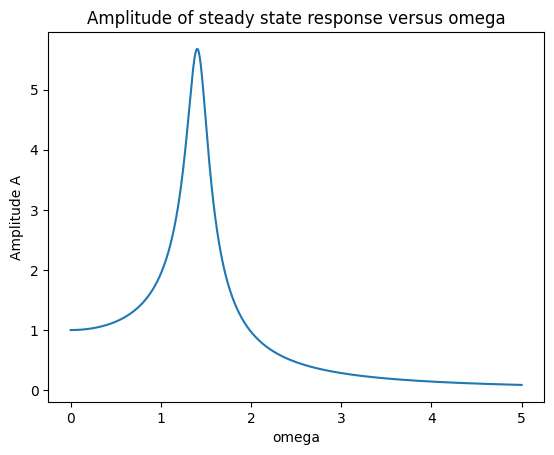

In [4]:
# Define the given parameters
m = 4
mu = 1
k = 8
F_0 = 8

# Define the range of omega values to plot
omega_vals = np.linspace(0, 5, 1000)

# Calculate the amplitude A for each value of omega
p = mu / (2 * m)
omega_0 = np.sqrt(k / m)
gamma = np.arctan(2 * omega_vals * p / (omega_0**2 - omega_vals**2))
A = F_0 / (m * np.sqrt((2 * omega_vals * p)**2 + (omega_0**2 - omega_vals**2)**2))

# Plot the amplitude A versus omega
plt.plot(omega_vals, A)
plt.xlabel('omega')
plt.ylabel('Amplitude A')
plt.title('Amplitude of steady state response versus omega')
plt.show()



(b) With the same parameters, plot the phase shift $\gamma$ of the steady state response versus $\omega$ for $0 \leq \omega \leq 5$

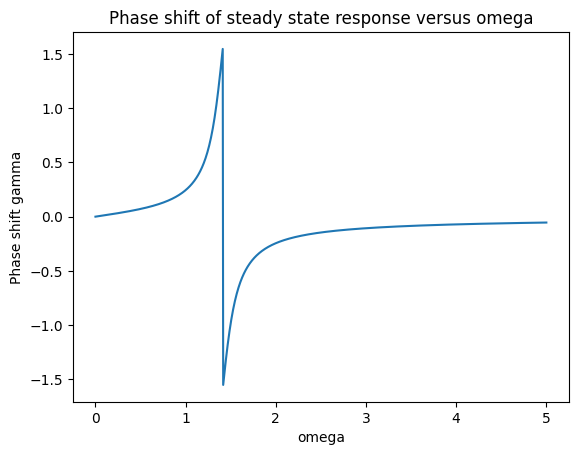

In [5]:
# Define the given parameters
m = 4
mu = 1
k = 8
F_0 = 8

# Define the range of omega values to plot
omega_vals = np.linspace(0, 5, 1000)

# Calculate the phase shift gamma for each value of omega
p = mu / (2 * m)
omega_0 = np.sqrt(k / m)
gamma = np.arctan(2 * omega_vals * p / (omega_0**2 - omega_vals**2))

# Plot the phase shift gamma versus omega
plt.plot(omega_vals, gamma)
plt.xlabel('omega')
plt.ylabel('Phase shift gamma')
plt.title('Phase shift of steady state response versus omega')
plt.show()


(c) Estimate the maximun value of $A$ and the frequency $\omega$ for which occurs. 

In [6]:
# Define the given parameters
m = 4
mu = 1
k = 8
F_0 = 8

# Define the range of omega values to plot
omega_vals = np.linspace(0, 5, 10000)

# Calculate the amplitude A for each value of omega
p = mu / (2 * m)
omega_0 = np.sqrt(k / m)
gamma = np.arctan(2 * omega_vals * p / (omega_0**2 - omega_vals**2))
A = F_0 / (m * np.sqrt((2 * omega_vals * p)**2 + (omega_0**2 - omega_vals**2)**2))

# Find the maximum value of A and its index
max_A_index = np.argmax(A)
max_A = A[max_A_index]

# Find the corresponding value of omega
max_omega = omega_vals[max_A_index]

# Print the results
print(f"The maximum value of A is {max_A:.2f} and it occurs at omega = {max_omega:.2f}")


The maximum value of A is 5.68 and it occurs at omega = 1.40


##### PROBLEM 2

Consider an undamped mass-spring system where $m = 2, k = 10$ and $\mu = 0$ and with forcing function $F(t) = cos(\omega t)$

$$
2y{''}(t) + 10y(t) = cos(\omega t), y(0) = y{'}(0)=0
$$

(a) Plot the solution $y(t)$ with $\omega = 2.5$ for $0 \leq t \leq 100$

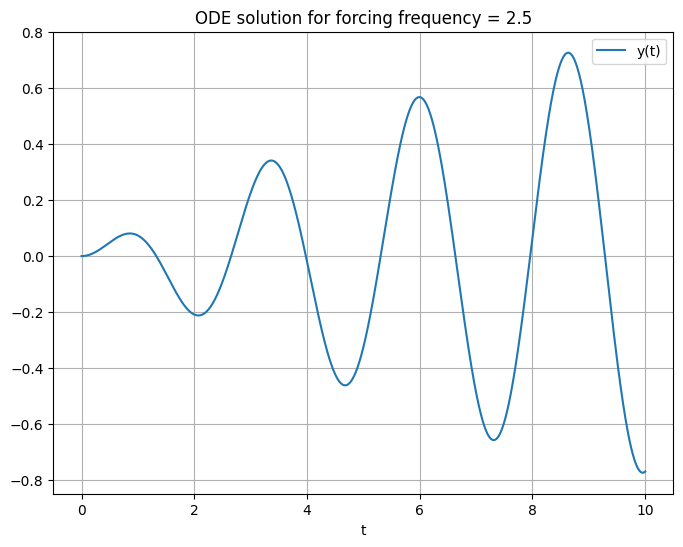

In [9]:
# Define the system of ODEs
def system(y, t, ω):
    y1, y2 = y
    dydt = [y2, (np.cos(ω*t) - 10*y1) / 2]
    return dydt

# Initial conditions
y0 = [0, 0]

# Time array
t = np.linspace(0, 10, 1000)

# Forcing frequency
ω = 2.5  

# Solve the ODE
sol = odeint(system, y0, t, args=(ω,))

# Plot the solution
plt.figure(figsize=(8, 6))
plt.title("ODE solution for forcing frequency = 2.5")
plt.plot(t, sol[:, 0], label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


(b) Experiment with different values for the foricng frequency $\omega$ in $F(t) =cos(\omega t)$. Find the maximum range of values (to $2$ decimal places) suh that the maximum amplitude $|y(t)|$ exceeds $1$. (Note. It may be helpful to use a for loop  and  max function)

In [8]:
# Define the system of ODEs
def system(y, t, ω):
    y1, y2 = y
    dydt = [y2, (np.cos(ω*t) - 10*y1) / 2]
    return dydt

# Initial conditions
y0 = [0, 0]

# Time array
t = np.linspace(0, 10, 1000)

# Forcing frequency range
ω_range = np.linspace(0, 10, 1000)

# Store ω values that result in max amplitude > 1
ω_values = []

for ω in ω_range:
    # Solve the ODE
    sol = odeint(system, y0, t, args=(ω,))
    
    # Find max amplitude
    max_amplitude = np.max(np.abs(sol[:, 0]))
    
    # Check if max amplitude > 1
    if max_amplitude > 1:
        ω_values.append(ω)

# Print the range of ω values
print(f"The range of ω values for which the maximum amplitude exceeds 1 is from {min(ω_values):.2f} to {max(ω_values):.2f}.")

The range of ω values for which the maximum amplitude exceeds 1 is from 2.08 to 2.27.
